# Diamond price prediction
**import libraries**

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={"figure.figsize":[7,5]}, font_scale = 1.1)

## Information on dataset

In [15]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
print("Original shape is 53940 X 10")
df.shape

Original shape is 53940 X 10


(53940, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**No null data, 10 columns included 3 objects and 7 numerical**

**Shows unique objects value**

In [19]:
# Excellent
# Very good
# Good
# Fair
# Poor
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [20]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [92]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [94]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [95]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Visualization & Preprocessing

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


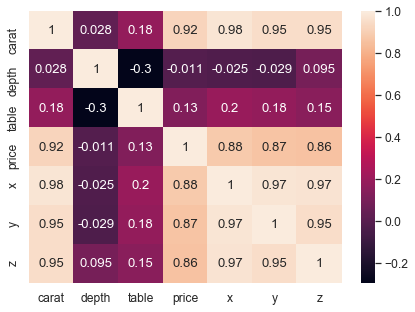

In [8]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)

* 1- We see here there\`s a relation between **carat** and **price** exponentialy the correlation is **0.921591.**

* From correlation we see strong correlation between x, y, z and price, carat.
* Strong correlation between carat and the price

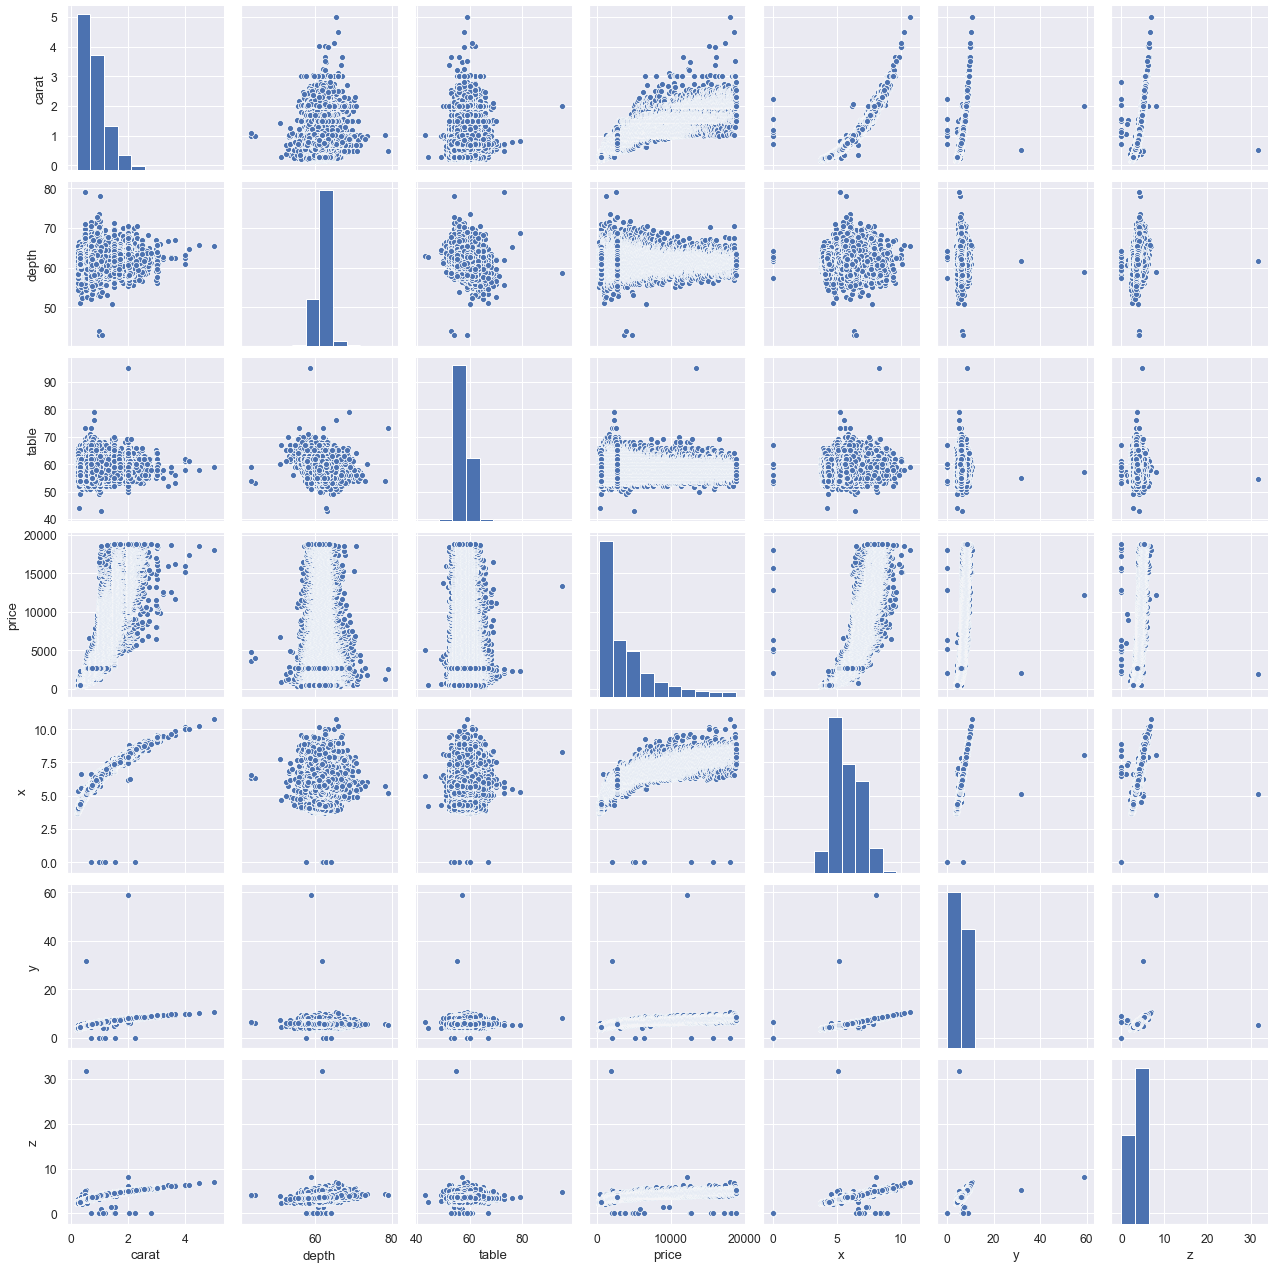

In [9]:
sns.pairplot(df)

* We see in whole graph there\`s nearly linear relation between carat and y, z.
* linear relation between x and z, y.
* **But** there\`s a relation between carat and the price that goes **<span style = "color:blue"> exponentially </span>** not linear.

### Some visualization on numerical data that has real correlation

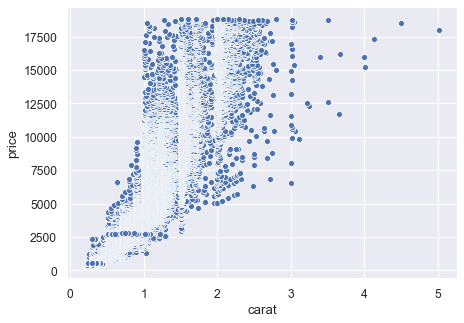

In [10]:
sns.scatterplot(x=df["carat"], y = df["price"])

**As we know that the relation between carat and price goes exponentially that means carat is so important**
* We see in that graph there\`s some outliers when carat > 3

In [11]:
df[df["carat"] > 3].shape
#About 32 rows

(32, 10)

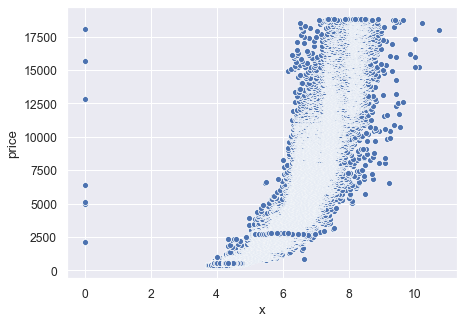

In [12]:
sns.scatterplot(x=df["x"], y = df["price"])

**The relation between x and price seem to goes exponentially.**
* We have some outliers when x less than 2 they are.

In [13]:
df[df["x"] < 2 ].shape
#About 8 rows

(8, 10)

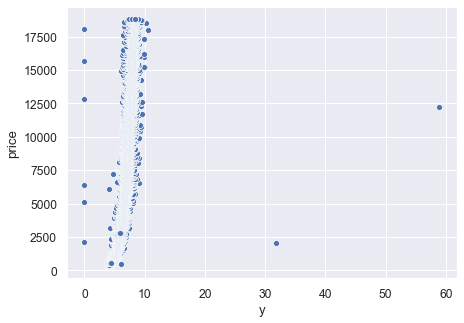

In [14]:
sns.scatterplot(x=df["y"], y = df["price"])

* We have outliers when y above 30 or y > 30.

In [15]:
df[df["y"] > 30 ].shape
#Only two rows

(2, 10)

In [5]:
df[df["y"] > 30 ]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


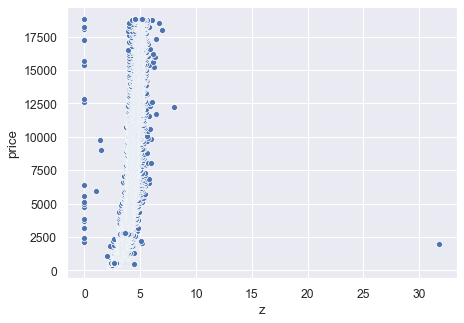

In [16]:
sns.scatterplot(x=df["z"], y = df["price"])

* We have outliers in z when it is above 30 or z > 30.

In [17]:
df[df["z"] > 30 ].shape
#There`s only one row

(1, 10)

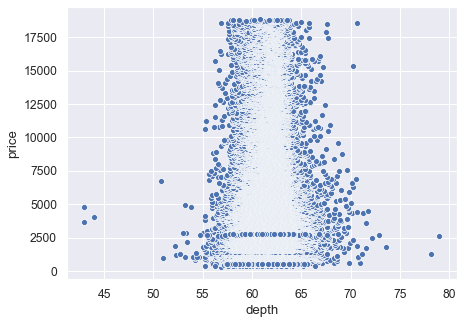

In [18]:
sns.scatterplot(x= df["depth"] , y=df["price"])

* May it\`s an outliers in the relation between depth and price when depth is above 75 and less than 45

In [19]:
df[(df["depth"] > 75) | (df["depth"] < 45 )].shape
#About 6 rows

(6, 10)

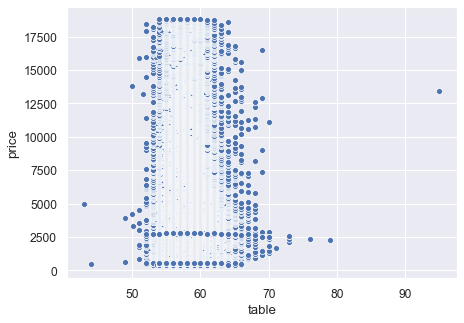

In [20]:
sns.scatterplot(x= df["table"] , y=df["price"])

* Outliers between table and price when table is above 90.

In [21]:
df[df["table"] > 90].shape
#Only one row

(1, 10)

## Work on outliers
**Identifying the outliers indexes**

In [21]:
carat_index = list(df[df["carat"] >= 3].index)
x_index = list(df[df["x"] < 2 ].index)
y_index = list(df[df["y"] > 30 ].index)
z_index = list(df[df["z"] > 30 ].index)
depth_index = list(df[(df["depth"] > 75) | (df["depth"] < 45 )].index)
table_index = list(df[df["table"] > 90].index)

indexes = carat_index + x_index + y_index + z_index + depth_index + table_index
len(indexes)

58

**Delete the outliers**

In [22]:
print("DataFrame shape before delete outliers is. ", df.shape)
for outlier in indexes:
    df.drop(outlier, inplace=True)
print("DataFrame shape after deleting outliers. ",df.shape)

DataFrame shape before delete outliers is.  (53940, 10)
DataFrame shape after deleting outliers.  (53882, 10)


## Back to vsuialize numerical data after removing outliers

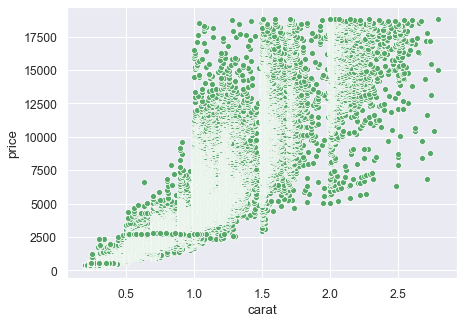

In [24]:
sns.scatterplot(x=df["carat"], y = df["price"], color='g')

**It lokes like better**

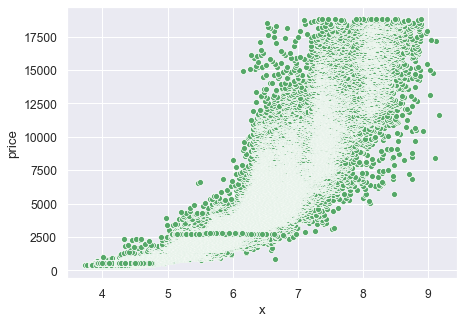

In [25]:
sns.scatterplot(x=df["x"], y = df["price"], color='g')

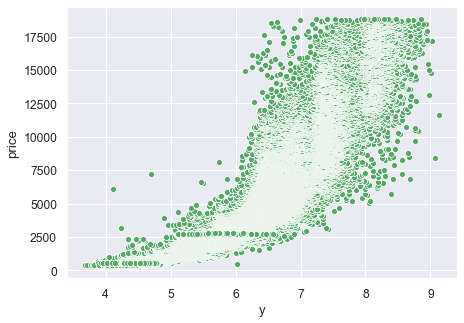

In [26]:
sns.scatterplot(x=df["y"], y = df["price"], color='g')

* **<span style="color:orange">Note that:</span>** before removing outliers the relation between y and the price isn\`t clear but after removing some outliers it seems like it goes exponentially.

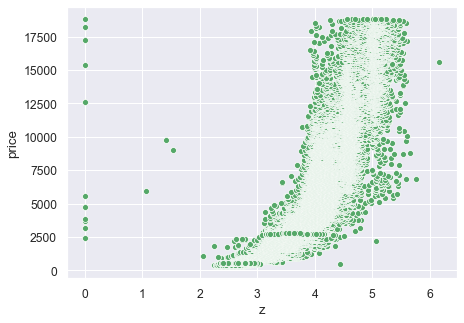

In [27]:
sns.scatterplot(x=df["z"], y = df["price"], color='g')

* Seem still some outliers when z < 2

In [23]:
z_index2 = list(df[df["z"] < 2].index)
for i in z_index2:
    df.drop(i, inplace=True)

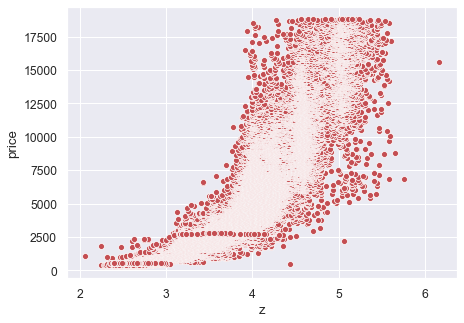

In [29]:
sns.scatterplot(x=df["z"], y = df["price"], color='r')

* the relation between z and price now goes exponentially just like x and y, now z is clear.

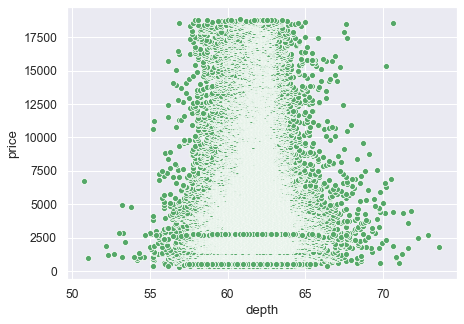

In [30]:
sns.scatterplot(x= df["depth"] , y=df["price"], color='g')

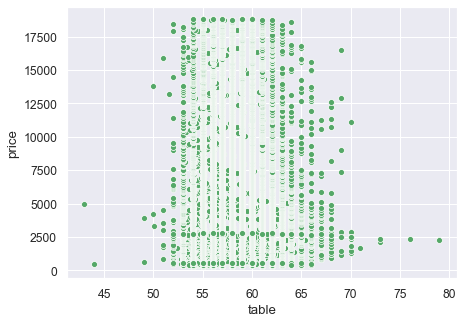

In [31]:
sns.scatterplot(x= df["table"] , y=df["price"], color='g')

## Categorical data
**Coutplot on the three categorical data**

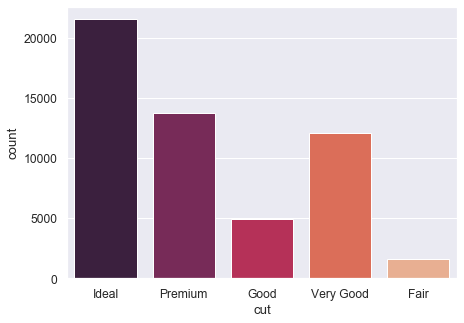

In [32]:
sns.countplot(df["cut"], palette='rocket')

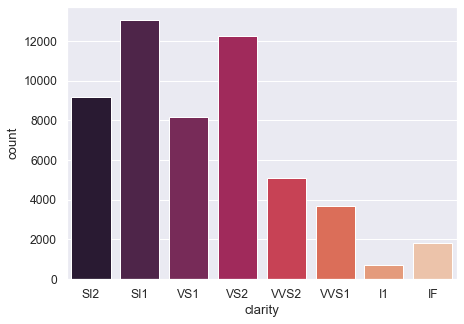

In [33]:
sns.countplot(df["clarity"], palette='rocket')

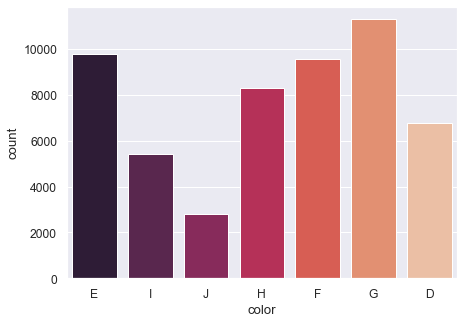

In [34]:
sns.countplot(df["color"], palette='rocket')

# Domain knowledge
## The 4C\`s.
**We go through these types of diamond charactirstics**
* Carat
* Cut
* Clarity
* Color

**And we show the relationship between those**

- 1- Carat and price.
- 2- Cut and price.
- 3- Clarity and price.
- 4- Color and price.

**Additionally we have dimension x, y, z related with price and it had strong correlation between them and the price**

**Finally relation between the 4C\`s**

## 4C\`s: 1st one is Carat
**To predict the price**

- We know that carat and price correlation is **0.921591.**
- We see that the relation between **carat** and **price** is exponentioally not linear.
- and we see here there\`s some outliers when the **carat** == 4 or above that.
* let\`s see its indexes.

**Carat Details**
- carat noun 1. a measure of the quality of gold. Pure gold is 24 carats. A 22-carat gold ring 2. a measure of the weight of precious stones a 5-carat diamond (NOTE: Another US spelling is karat.)
- Carat is refers to its weight not size and better weight is better than smaller.
- Carat weight isn\`s related to the sparkle, and the sparkle is a bright light, beautiful sparkle is related to the good **cut**
- the relationship betwwn carat weight and price is depends on rarity or availability of a rough crystal.
- carat is also a function of finding rough crystals with desirable color and external and internal characteristics that influenced clarity when diamond is <span style='color:red'> cut</span>.

**Rough crystals: are rugged an untouched by humans and machine and hence, the most scared from gemstone**

**Size it is a term that basically refers to either length area or volume (i.e how big an objet is). Weight it is the force of gravity on your body**

### Cut details
- cut is the most important, the better cut the more diamond sparkle.
- Diamond has 4 great parts " Table, Crown, Gridle, Pavilion.
- even though the diamond has perfect color and clarity a diamond with a poor cut will <span style="color:green">dulled brilliance.</span>

In [25]:
depth = df["z"] / ((df["x"] + df["y"])/2) * 100
pd.DataFrame(depth, columns=["Depth size in percent"]).head(15)

,Depth size in percent
0,61.286255
1,59.767141
2,56.896552
3,62.396204
4,63.291139
5,62.784810
6,62.295082
7,61.858191
8,65.098039
9,59.378882


## Converting  Categorical Data (CCD)

In [12]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [24]:
def grade(x):
    x = str(x)
    if x == "Fair":
        return 1
    elif x == "Good":
        return 2
    elif x == "Very Good":
        return 3
    elif x == "Premium":
        return 4
    elif x == "Ideal":
        return 5

In [25]:
df["cut_grade"] = df["cut"].apply(grade)
df["cut_grade"].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [26]:
def color_grade(x):
    x = str(x)
    if x == "J":
        return 1
    elif x == "I":
        return 1
    elif x == "H":
        return 2
    elif x == "G":
        return 3
    elif x == "F":
        return 4
    elif x == "E":
        return 5
    elif x == "D":
        return 6

**Color grades order: D > E > F > G > H > I, J**

In [27]:
df["color_grade"] = df["color"].apply(color_grade)
df["color_grade"].unique()

array([5, 1, 2, 4, 3, 6], dtype=int64)

**Clarity quality order: IF > VVS2 or VVS1 > VS1 or VS2 > SI1 or SI2 > I1**
- Flawless Diamonds
    - FL & IF Diamonds (Rare Finds)
- Slightly Included Diamonds
    - VVS Diamonds (Excellent Quality)
    - VS & SI Diamonds (Best Value & Most Popular) 

In [28]:
def clarity_quality(x):
    x = str(x)
    if x == "I1":
        return 1
    elif x == "SI2":
        return 2
    elif x == "SI1":
        return 3
    elif x == "VS2":
        return 4
    elif x == "VS1":
        return 5
    elif x == "VVS2":
        return 6
    elif x == "VVS1":
        return 7
    elif x == "IF":
        return 8

In [29]:
df["clear_quality"] = df["clarity"].apply(clarity_quality)
df["clear_quality"].unique()

array([2, 3, 5, 4, 6, 7, 1, 8], dtype=int64)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_grade,color_grade,clear_quality
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,5,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,5,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,5,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,1,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2


## Drop un-wanted columns

In [13]:
df.drop(["cut","color","clarity","depth","table"], inplace=True, axis=1)
#Final DataFrame
df.head(2)

,carat,price,x,y,z,cut_grade,color_grade,clear_quality
0,0.23,326,3.95,3.98,2.43,5,5,2
1,0.21,326,3.89,3.84,2.31,4,5,3


## The End Of Preprocessing

## Machine Learning
**Split data into training and testing**

In [13]:
df.head()

,carat,price,x,y,z,cut_grade,color_grade,clear_quality
0,0.23,326,3.95,3.98,2.43,5,5,2
1,0.21,326,3.89,3.84,2.31,4,5,3
2,0.23,327,4.05,4.07,2.31,2,5,5
3,0.29,334,4.20,4.23,2.63,4,1,4
4,0.31,335,4.34,4.35,2.75,2,1,2


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"], axis = 1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

#print all shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40437, 7)
(13480, 7)
(40437,)
(13480,)


**Import DecisionTreeRegressor**

In [15]:
from sklearn.tree import DecisionTreeRegressor

model_deployment = DecisionTreeRegressor(max_depth = 21,random_state=400)
model_deployment.fit(X_train, y_train)
y_pred = model_deployment.predict(X_test)
#Model score
print("Model train accuracy score is :", model_deployment.score(X_train, y_train))
print("Model test accuracy score is :", model_deployment.score(X_test, y_test))

Model train accuracy score is : 0.9996235584137658
Model test accuracy score is : 0.9605314565923078


**Find max_depth**

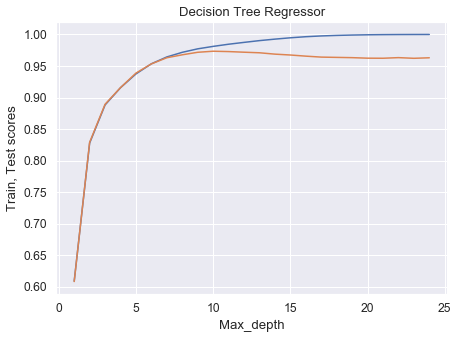

In [97]:
depths = [i for i in range(1, 25)]
train_score = []
test_score = []

for i in depths:
    DTR = DecisionTreeRegressor(max_depth = i)
    DTR.fit(X_train, y_train)
    train_score.append(DTR.score(X_train, y_train))
    test_score.append(DTR.score(X_test, y_test))
    
plt.plot(depths, train_score, label="Training")
plt.plot(depths, test_score, label="Testing")
plt.xlabel("Max_depth")
plt.ylabel("Train, Test scores")
plt.title("Decision Tree Regressor")
plt.show()

**Best max_depth is 7**

**Model performance**

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2_Score is: ", r2_score(y_test, y_pred).round(4))

R2_Score is:  0.9605


**Try to predict diamond price predictions**

In [87]:
df.iloc[5000].to_frame()
print("Try to predict existing data the row number 5000 existed price 3743, let`s see the ML says: ")
print("ML price ", model_deployment.predict([[1.03, 6.66, 6.63, 3.80, 2, 6, 2]])[0])

Try to predict existing data the row number 5000 existed price 3743, let`s see the ML says: 
ML price  3743.0


**Save and deploy model**

In [88]:
import joblib

joblib.dump(model_deployment, "Diamond predictions with decision tree.h5")
joblib.load("Diamond predictions with decision tree.h5")

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=21,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=400, splitter='best')

# End project